### Dataset preparation / downloading from Kaggle

In [ ]:
# Install the Kaggle Python package
!pip install kaggle

In [ ]:
# Create a directory named .kaggle for the kaggle.json file
!mkdir -p /home/adam/.kaggle/

In [ ]:
# Set appropriate permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Move the kaggle.json file to the .kaggle directory
!mv ~/Pobrane/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Create an instance of KaggleApi
api = KaggleApi()

# Authenticate using the Kaggle API
api.authenticate()

In [ ]:
# Download dataset using Kaggle CLI
!kaggle datasets download -d adityakadiwal/water-potability -p dataset


In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = 'dataset/water-potability.zip'

# Path to the directory where you want to extract files
extracted_dir = 'data'

# Extract files from the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Confirm that the files have been extracted
os.listdir(extracted_dir)

### Environment preparation

In [62]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from itertools import product

### Loading a dataset

In [2]:
# Read the CSV file into a DataFrame
df_init = pd.read_csv('data/water_potability.csv')

# Display the first few rows of the DataFrame
display(df_init.head(2))

# Display the last few rows of the DataFrame
display(df_init.tail(2))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


#### Basic data information 

1. pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


In [3]:
# Create a copy of the DataFrame
df = df_init.copy()

In [4]:
# Converting string columns to lowercase and replacing spaces with underscores
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [5]:
# Retrieve the column names of the DataFrame and convert them to a Python list
df.columns.values.tolist()

['ph',
 'hardness',
 'solids',
 'chloramines',
 'sulfate',
 'conductivity',
 'organic_carbon',
 'trihalomethanes',
 'turbidity',
 'potability']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          2495 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3114 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.shape

(3276, 10)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


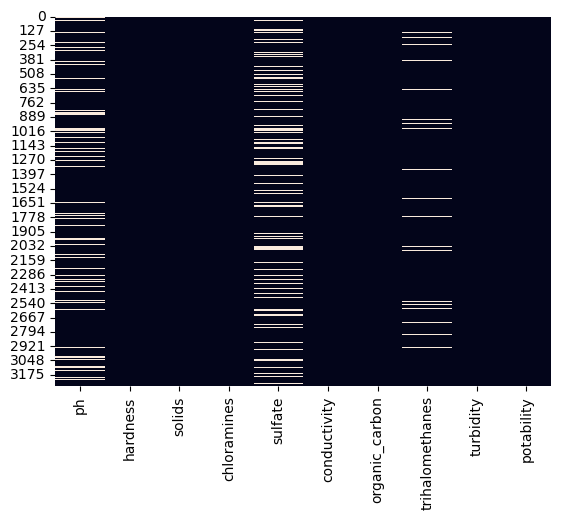

                 Missing Count Missing Percent
ph                         491          14.99%
hardness                     0           0.00%
solids                       0           0.00%
chloramines                  0           0.00%
sulfate                    781          23.84%
conductivity                 0           0.00%
organic_carbon               0           0.00%
trihalomethanes            162           4.95%
turbidity                    0           0.00%
potability                   0           0.00%


In [10]:
def display_missing_data_info(df):
    # Oblicz ilość brakujących danych
    missing_count = df.isnull().sum()

    # Oblicz procentowy udział brakujących danych
    missing_percent = df.isnull().sum() * 100 / len(df)

    percent_missing_rounded = missing_percent.round(2)  # Zaokrąglenie do dwóch miejsc po przecinku

    # Wyświetlanie w formacie procentowym
    formatted_percent_missing = percent_missing_rounded.apply(lambda x: f"{x:.2f}%")

    # Połącz obie informacje w jedną ramkę danych
    missing_info = pd.concat([missing_count, formatted_percent_missing], axis=1)
    missing_info.columns = ['Missing Count', 'Missing Percent']

    # Wizualizacja brakujących danych
    sns.heatmap(df.isnull(), cbar=False)
    plt.show()

    # Wyświetl tabelę z ilością i procentem brakujących danych
    print(missing_info)

# Przykład użycia funkcji na ramce danych df
display_missing_data_info(df)

Uzupełnianie danych *ph*

In [11]:
# Definicja zakresów twardości w jednostkach amerykańskich
hardness_ranges = {
    'Very soft': (0, 89),
    'Soft': (89, 179),
    'Medium hardness': (179, 268),
    'Of considerable hardness': (268, 357),
    'Hard': (357, 535),
    'Very hard': (535, float('inf'))
}

# Tworzenie DataFrame
data = {'American unit CaCO3 mg/l(ppm)': []}

for water_type, (lower, upper) in hardness_ranges.items():
    data['American unit CaCO3 mg/l(ppm)'].append(f"{lower} – {upper}")

df_hardness_ranges = pd.DataFrame(data, index=hardness_ranges.keys())

# Wyświetlanie utworzonego DataFrame
print(df_hardness_ranges)

                         American unit CaCO3 mg/l(ppm)
Very soft                                       0 – 89
Soft                                          89 – 179
Medium hardness                              179 – 268
Of considerable hardness                     268 – 357
Hard                                         357 – 535
Very hard                                    535 – inf


In [12]:
# Ustawienie progu twardości wody
hardness_threshold = 179

# Podział danych na dwie kategorie 'hardness' (poniżej 179 i powyżej 179)
df['hardness_category'] = pd.cut(df['hardness'], bins=[-float('inf'), hardness_threshold, float('inf')],
                                 labels=['Below 179', 'Above 179'])

# Obliczenie średniej dla każdej kategorii 'hardness' i 'potability'
average_ph_by_category = df.groupby(['potability', 'hardness_category'])['ph'].mean().unstack()

# Wyświetlenie wyników
print("Średnia wartość 'ph' dla każdej kategorii 'hardness' i 'potability':")
print(average_ph_by_category)

Średnia wartość 'ph' dla każdej kategorii 'hardness' i 'potability':
hardness_category  Below 179  Above 179
potability                             
0                   6.810854   7.185792
1                   7.047832   7.084045


In [13]:
def fill_missing_data_ph(df):
    # Utworzenie df_mean jako kopii oryginalnego DataFrame
    df_mean_fill = df.copy()

    # Podział danych na kategorie 'hardness_threshold'
    df_mean_fill['hardness_threshold'] = pd.cut(df_mean_fill['hardness'], bins=[-float('inf'), 89, 179, 269, float('inf')],
                                           labels=['Below 89', '90-179', '180-269', 'Above 268'])

    # Warunki dla uzupełniania danych
    condition_1 = (df_mean_fill['hardness_threshold'] == 'Below 89') & (df_mean_fill['potability'] == 0)
    condition_2 = (df_mean_fill['hardness_threshold'] == 'Below 89') & (df_mean_fill['potability'] == 1)
    condition_3 = (df_mean_fill['hardness_threshold'] == '90-179') & (df_mean_fill['potability'] == 0)
    condition_4 = (df_mean_fill['hardness_threshold'] == '90-179') & (df_mean_fill['potability'] == 1)
    condition_5 = (df_mean_fill['hardness_threshold'] == '180-269') & (df_mean_fill['potability'] == 0)
    condition_6 = (df_mean_fill['hardness_threshold'] == '180-269') & (df_mean_fill['potability'] == 1)
    condition_7 = (df_mean_fill['hardness_threshold'] == 'Above 268') & (df_mean_fill['potability'] == 0)
    condition_8 = (df_mean_fill['hardness_threshold'] == 'Above 268') & (df_mean_fill['potability'] == 1)

    # Uzupełnienie danych w kolumnie 'ph' na podstawie warunków
    df_mean_fill.loc[condition_1, 'ph'] = df_mean_fill.loc[condition_1, 'ph'].fillna(df_mean_fill.loc[condition_1, 'ph'].mean())
    df_mean_fill.loc[condition_2, 'ph'] = df_mean_fill.loc[condition_2, 'ph'].fillna(df_mean_fill.loc[condition_2, 'ph'].mean())
    df_mean_fill.loc[condition_3, 'ph'] = df_mean_fill.loc[condition_3, 'ph'].fillna(df_mean_fill.loc[condition_3, 'ph'].mean())
    df_mean_fill.loc[condition_4, 'ph'] = df_mean_fill.loc[condition_4, 'ph'].fillna(df_mean_fill.loc[condition_4, 'ph'].mean())
    df_mean_fill.loc[condition_5, 'ph'] = df_mean_fill.loc[condition_5, 'ph'].fillna(df_mean_fill.loc[condition_5, 'ph'].mean())
    df_mean_fill.loc[condition_6, 'ph'] = df_mean_fill.loc[condition_6, 'ph'].fillna(df_mean_fill.loc[condition_6, 'ph'].mean())
    df_mean_fill.loc[condition_7, 'ph'] = df_mean_fill.loc[condition_7, 'ph'].fillna(df_mean_fill.loc[condition_7, 'ph'].mean())
    df_mean_fill.loc[condition_8, 'ph'] = df_mean_fill.loc[condition_8, 'ph'].fillna(df_mean_fill.loc[condition_8, 'ph'].mean())

    return df_mean_fill

In [14]:
# Utworzenie nowego zestawu uzupełnionymi danym jako śreedni ph na podstawie zakresów twardości wody
df_mean = fill_missing_data_ph(df)

In [15]:
# Ustawienie progu twardości wody
hardness_threshold = 179

# Podział danych na dwie kategorie 'hardness' (poniżej 179 i powyżej 179)
df_mean['hardness_category'] = pd.cut(df_mean['hardness'], bins=[-float('inf'), hardness_threshold, float('inf')],
                                 labels=['Below 179', 'Above 179'])

# Obliczenie średniej dla każdej kategorii 'hardness' i 'potability'
average_ph_by_category = df_mean.groupby(['potability', 'hardness_category'])['ph'].mean().unstack()

# Wyświetlenie wyników
print("Średnia wartość 'ph' dla każdej kategorii 'hardness' i 'potability':")
print(average_ph_by_category)

Średnia wartość 'ph' dla każdej kategorii 'hardness' i 'potability':
hardness_category  Below 179  Above 179
potability                             
0                   6.810854   7.184008
1                   7.039684   7.084732


Uzupełnianie danych *sulfate*

In [16]:
def describe_sulfate_by_potability_and_ph(df):
    # Dodanie kolumny ph_category
    df['ph_category'] = np.where(df['ph'] < 7, 'Below 7', '7 and Above')

    # Grupowanie danych
    grouped_data = df.groupby(['potability', 'ph_category'])['sulfate'].mean().unstack()

    # Dodanie średniej dla każdego zakresu stężenia siarczanów
    grouped_data['Mean Sulfate'] = df.groupby('potability')['sulfate'].mean()

    return grouped_data

# Przykład użycia funkcji
result = describe_sulfate_by_potability_and_ph(df_mean)
print("Średnie stężenia siarczanów dla różnych kategorii potability, ph oraz ogólna średnia:")
print(result)

Średnie stężenia siarczanów dla różnych kategorii potability, ph oraz ogólna średnia:
ph_category  7 and Above     Below 7  Mean Sulfate
potability                                        
0             339.747017  328.421520     334.56429
1             325.343724  340.946613     332.56699


In [17]:
def fill_missing_sulfate_with_mean(df):
    # Dodanie kolumny ph_category
    df['ph_category'] = np.where(df['ph'] < 7, 'Below 7', '7 and Above')

    # Uzupełnienie brakujących wartości w kolumnie 'sulfate' średnimi dla poszczególnych kategorii
    df['sulfate'] = df.groupby(['potability', 'ph_category'])['sulfate'].transform(lambda x: x.fillna(x.mean()))

    return df

In [18]:
# Przykład użycia funkcji
df_mean = fill_missing_sulfate_with_mean(df_mean)

Uzupełnianie danych *Trihalometany*

In [19]:
def describe_tmh_by_potability_and_ph(df):
    # Dodanie kolumny trihalomethanes_category
    df['trihalomethanes_category'] = np.where(df['ph'] < 7, 'Below 7', '7 and Above')

    # Grupowanie danych
    grouped_data = df.groupby(['potability', 'trihalomethanes_category'])['trihalomethanes'].mean().unstack()

    # Dodanie średniej dla każdego zakresu stężenia siarczanów
    grouped_data['Mean Trihalomethanes'] = df.groupby('potability')['trihalomethanes'].mean()

    return grouped_data

# Przykład użycia funkcji
result = describe_tmh_by_potability_and_ph(df_mean)
print("Średnie stężenia Trihalomethanes dla różnych kategorii potability, ph oraz ogólna średnia:")
print(result)

Średnie stężenia Trihalomethanes dla różnych kategorii potability, ph oraz ogólna średnia:
trihalomethanes_category  7 and Above    Below 7  Mean Trihalomethanes
potability                                                            
0                           66.320090  66.283562             66.303555
1                           66.775596  66.270305             66.539684


In [20]:
def fill_missing_tmh_with_mean(df):
    # Dodanie kolumny ph_category
    df['ph_category'] = np.where(df['ph'] < 7, 'Below 7', '7 and Above')

    # Uzupełnienie brakujących wartości w kolumnie 'sulfate' średnimi dla poszczególnych kategorii
    df['trihalomethanes'] = df.groupby(['potability', 'ph_category'])['trihalomethanes'].transform(lambda x: x.fillna(x.mean()))

    return df

In [21]:
# Przykład użycia funkcji
df_mean = fill_missing_tmh_with_mean(df_mean)

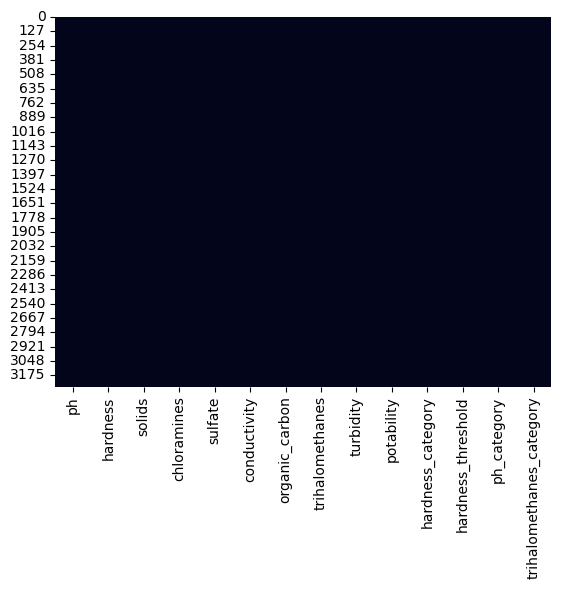

                          Missing Count Missing Percent
ph                                    0           0.00%
hardness                              0           0.00%
solids                                0           0.00%
chloramines                           0           0.00%
sulfate                               0           0.00%
conductivity                          0           0.00%
organic_carbon                        0           0.00%
trihalomethanes                       0           0.00%
turbidity                             0           0.00%
potability                            0           0.00%
hardness_category                     0           0.00%
hardness_threshold                    0           0.00%
ph_category                           0           0.00%
trihalomethanes_category              0           0.00%


In [22]:
def display_missing_data_info(df):
    # Oblicz ilość brakujących danych
    missing_count = df.isnull().sum()

    # Oblicz procentowy udział brakujących danych
    missing_percent = df.isnull().sum() * 100 / len(df)

    percent_missing_rounded = missing_percent.round(2)  # Zaokrąglenie do dwóch miejsc po przecinku

    # Wyświetlanie w formacie procentowym
    formatted_percent_missing = percent_missing_rounded.apply(lambda x: f"{x:.2f}%")

    # Połącz obie informacje w jedną ramkę danych
    missing_info = pd.concat([missing_count, formatted_percent_missing], axis=1)
    missing_info.columns = ['Missing Count', 'Missing Percent']

    # Wizualizacja brakujących danych
    sns.heatmap(df.isnull(), cbar=False)
    plt.show()

    # Wyświetl tabelę z ilością i procentem brakujących danych
    print(missing_info)

# Przykład użycia funkcji na ramce danych df
display_missing_data_info(df_mean)

In [23]:
df = df_mean.copy()

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080533,1.471398,0.000000,6.277673,7.116613,7.873622,14.000000
hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
sulfate,3276.0,333.854525,36.285680,129.000000,317.094638,333.875416,350.385756,481.030642
conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
trihalomethanes,3276.0,66.395484,15.769934,0.738000,56.647656,66.320090,76.666609,124.000000
turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [31]:
# Funkcja do wyświetlania kowariancji tylko dla kolumn numerycznych
def display_numeric_covariance(df, title):
    # Wybierz tylko kolumny numeryczne
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Sprawdź, czy istnieją kolumny numeryczne do analizy
    if numeric_df.shape[1] == 0:
        print("Brak kolumn numerycznych do analizy.")
        return

    # Oblicz kowariancję tylko dla kolumn numerycznych
    covariance_matrix = numeric_df.cov()

    # Stylizacja i wyświetlenie wyników
    styled_matrix = covariance_matrix.style.background_gradient(cmap="Blues")
    print(f"Covariance: {title}")
    print(f"Shape: {numeric_df.shape}")
    display(styled_matrix)

# Przykład użycia funkcji dla różnych DataFrame
display_numeric_covariance(df, "df")

Covariance: df
Shape: (3276, 10)


,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
ph,2.165011,4.065240,-1092.813045,-0.074040,0.993922,2.024858,0.186542,0.057152,-0.042188,-0.003423
hardness,4.065240,1081.078715,-13521.486526,-1.564367,-100.901251,-63.552473,0.392670,-6.580546,-0.370747,-0.221943
solids,-1092.813045,-13521.486526,76887834.361898,-973.746052,-48938.938849,9802.117116,297.108377,-1226.143931,133.751106,144.345121
chloramines,-0.074040,-1.564367,-973.746052,2.506158,1.022765,-2.621264,-0.066268,0.415856,0.002920,0.018365
sulfate,0.993922,-100.901251,-48938.938849,1.022765,1316.650577,-37.310953,3.467955,-16.122792,-0.292843,-0.472145
conductivity,2.024858,-63.552473,9802.117116,-2.621264,-37.310953,6532.529330,5.605967,1.637000,0.365712,-0.320499
organic_carbon,0.186542,0.392670,297.108377,-0.066268,3.467955,5.605967,10.943936,-0.674963,-0.070499,-0.048419
trihalomethanes,0.057152,-6.580546,-1226.143931,0.415856,-16.122792,1.637000,-0.674963,248.690804,-0.265439,0.056067
turbidity,-0.042188,-0.370747,133.751106,0.002920,-0.292843,0.365712,-0.070499,-0.265439,0.608997,0.000602
potability,-0.003423,-0.221943,144.345121,0.018365,-0.472145,-0.320499,-0.048419,0.056067,0.000602,0.237997


In [32]:
# Funkcja do wyświetlania korelacji tylko dla kolumn numerycznych
def display_numeric_correlation(df, title):
    # Wybierz tylko kolumny numeryczne
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Sprawdź, czy istnieją kolumny numeryczne do analizy
    if numeric_df.shape[1] == 0:
        print("Brak kolumn numerycznych do analizy.")
        return

    # Oblicz korelację tylko dla kolumn numerycznych
    correlation_matrix = numeric_df.corr()

    # Stylizacja i wyświetlenie wyników
    styled_matrix = correlation_matrix.style.background_gradient(cmap="Blues")
    print(f"Correlation: {title}")
    print(f"Shape: {numeric_df.shape}")
    display(styled_matrix)

# Przykład użycia funkcji dla różnych DataFrame
display_numeric_correlation(df, "df")


Correlation: df
Shape: (3276, 10)


,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
ph,1.000000,0.084029,-0.084701,-0.031786,0.018616,0.017026,0.038323,0.002463,-0.036741,-0.004769
hardness,0.084029,1.000000,-0.046899,-0.030054,-0.084573,-0.023915,0.003610,-0.012691,-0.014449,-0.013837
solids,-0.084701,-0.046899,1.000000,-0.070148,-0.153812,0.013831,0.010242,-0.008867,0.019546,0.033743
chloramines,-0.031786,-0.030054,-0.070148,1.000000,0.017805,-0.020486,-0.012653,0.016657,0.002363,0.023779
sulfate,0.018616,-0.084573,-0.153812,0.017805,1.000000,-0.012722,0.028890,-0.028176,-0.010342,-0.026672
conductivity,0.017026,-0.023915,0.013831,-0.020486,-0.012722,1.000000,0.020966,0.001284,0.005798,-0.008128
organic_carbon,0.038323,0.003610,0.010242,-0.012653,0.028890,0.020966,1.000000,-0.012938,-0.027308,-0.030001
trihalomethanes,0.002463,-0.012691,-0.008867,0.016657,-0.028176,0.001284,-0.012938,1.000000,-0.021569,0.007288
turbidity,-0.036741,-0.014449,0.019546,0.002363,-0.010342,0.005798,-0.027308,-0.021569,1.000000,0.001581
potability,-0.004769,-0.013837,0.033743,0.023779,-0.026672,-0.008128,-0.030001,0.007288,0.001581,1.000000


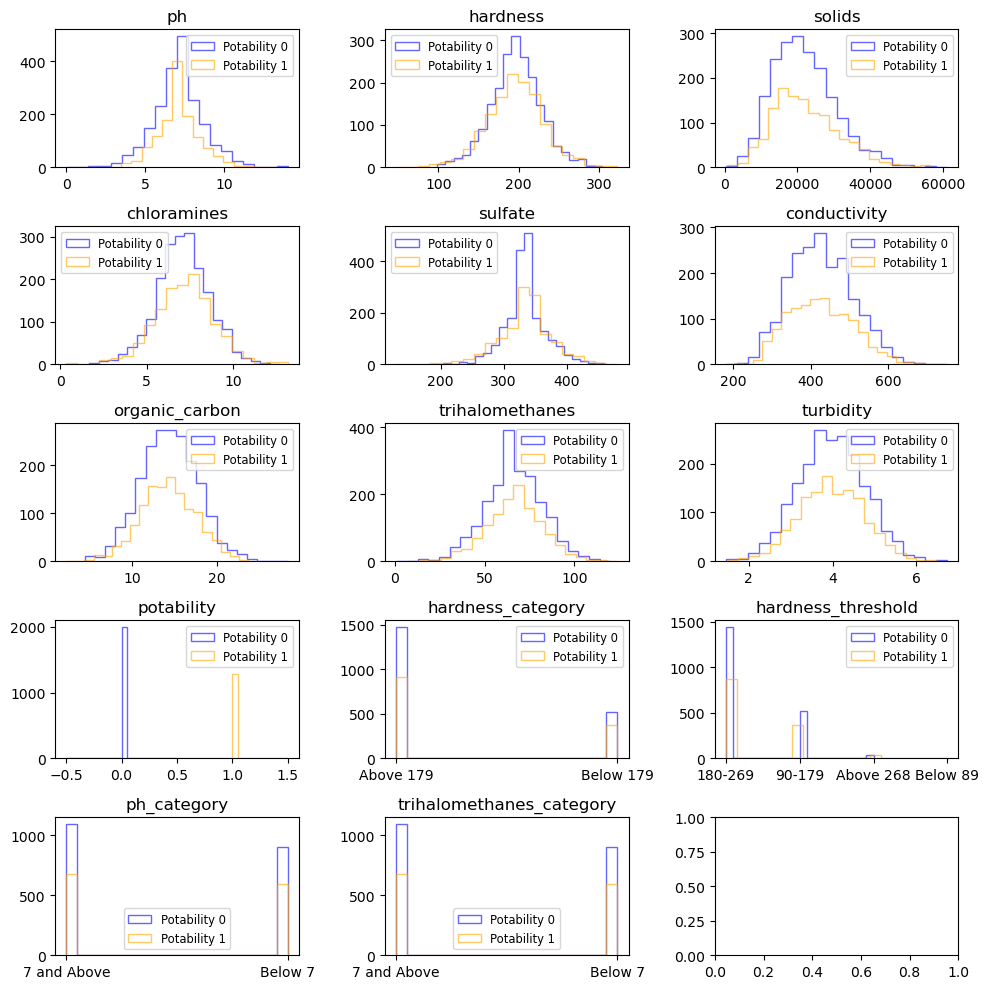

In [33]:
def display_individual_histograms(df, num_cols_per_row=3, figsize=(10, 10), colors=None, alpha=None):
    num_cols = df.shape[1]  # Wyłączamy kolumnę 'potability'
    num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

    # Ustawienia układu wykresów
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=figsize)

    # Wyświetl histogramy dla każdej cechy z podziałem na 'potability'
    for i, column in enumerate(df.columns):
        row, col = divmod(i, num_cols_per_row)

        for potability, color in zip([0, 1], colors):
            subset = df[df['potability'] == potability]

            # Histogram
            axs[row, col].hist(subset[column], bins=20, edgecolor=color, alpha=alpha, label=f'Potability {potability}', histtype="step")

        axs[row, col].set_title(f'{column}')
        axs[row, col].grid(False)
        axs[row, col].legend(fontsize='small', markerscale=0.4)

    plt.tight_layout()
    plt.show()

# Przykład użycia funkcji z niestandardowymi ustawieniami kolorów i wartościami alpha
display_individual_histograms(df, colors=['blue', 'orange'], alpha=0.6)


In [34]:
df.columns

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability',
       'hardness_category', 'hardness_threshold', 'ph_category',
       'trihalomethanes_category'],
      dtype='object')

In [35]:
columns_to_drop = ['hardness_category', 'hardness_threshold', 'ph_category', 'trihalomethanes_category']
df = df.drop(columns=columns_to_drop)

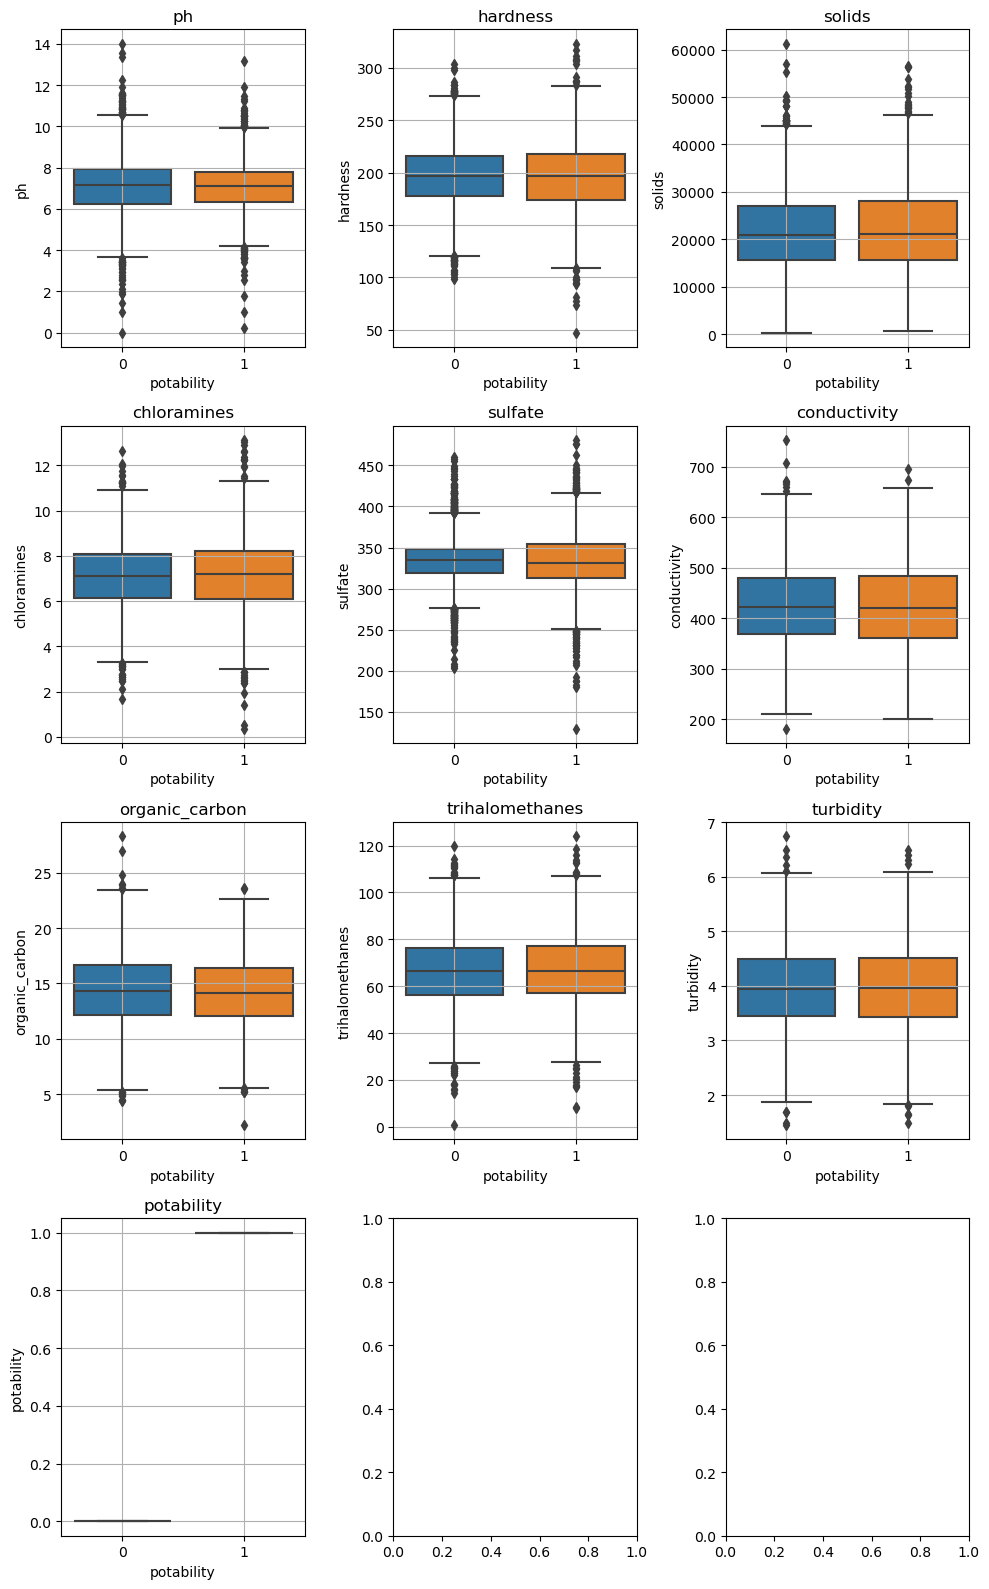

In [37]:
def display_boxplots(df, columns_to_analyze, num_cols_per_row=3, figsize=(10, 4)):
    # Ustawienia układu wykresów
    num_cols = len(columns_to_analyze)
    num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(figsize[0], figsize[1] * num_rows))
    fig.subplots_adjust(hspace=0.5)

    # Wyświetlenie boxplotów dla każdej kolumny z uwzględnieniem potability
    for i, column in enumerate(columns_to_analyze):
        row, col = divmod(i, num_cols_per_row)
        sns.boxplot(data=df, x='potability', y=column, ax=axs[row, col])
        axs[row, col].set_title(f'{column}')
        axs[row, col].grid(True)

    plt.tight_layout()
    plt.show()

# Przykład użycia funkcji
display_boxplots(df, columns_to_analyze=df.columns)


In [38]:
def count_outliers_by_potability(df, multiplier=1.5):
    # Utworzenie ramki danych do zliczania wartości odstających
    outliers_count = pd.DataFrame(index=['potability_0', 'potability_1'], columns=df.columns)
    outliers_count = outliers_count.fillna(0)

    # Iteracja przez kolumny
    for column in df.columns:
        # Iteracja po wartościach potability (0 i 1)
        for potability_value in [0, 1]:
            # Wybór danych dla danej kolumny i wartości potability
            subset = df[df['potability'] == potability_value][column]

            # Obliczenie granic odstających
            Q1 = subset.quantile(0.25)
            Q3 = subset.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            # Zliczenie wartości odstających
            outliers_count.loc[f'potability_{potability_value}', column] = ((subset < lower_bound) | (subset > upper_bound)).sum()

    return outliers_count

# Przykład użycia funkcji
outliers_count = count_outliers_by_potability(df)
print("Liczba wartości odstających w każdej kolumnie z podziałem na potability:")
print(outliers_count)


Liczba wartości odstających w każdej kolumnie z podziałem na potability:
              ph  hardness  solids  chloramines  sulfate  conductivity  \
potability_0  66        51      29           31      175             8   
potability_1  55        26      19           27       83             2   

              organic_carbon  trihalomethanes  turbidity  potability  
potability_0              16               31          9           0  
potability_1               8               22          9           0  


In [39]:
# Ustawienie warunków progowych dla wszystkich kolumn
lower_bounds = df.quantile(0.25) - 1.5 * (df.quantile(0.75) - df.quantile(0.25))
upper_bounds = df.quantile(0.75) + 1.5 * (df.quantile(0.75) - df.quantile(0.25))

# Zastosowanie warunków progowych do każdej kolumny
condition = ((df >= lower_bounds) & (df <= upper_bounds)).all(axis=1)

# Usunięcie wierszy, które nie spełniają warunków progowych
df_cleaned = df[condition]
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2666.0,7.073893,1.216507,3.902476,6.348026,7.116613,7.792306,10.252816
hardness,2666.0,197.051982,28.366547,118.988579,179.010144,197.561474,215.744047,275.886513
solids,2666.0,21486.829049,7924.092724,320.942611,15596.765222,20583.142637,26742.195037,44652.363872
chloramines,2666.0,7.111191,1.413403,3.194969,6.188575,7.114169,8.053054,11.086526
sulfate,2666.0,333.827894,26.715210,267.202392,319.481628,334.045574,347.921235,400.274579
conductivity,2666.0,425.811207,79.988085,201.619737,365.641745,421.320293,481.446065,652.537592
organic_carbon,2666.0,14.305441,3.217070,5.362371,12.082883,14.219418,16.575501,23.234326
trihalomethanes,2666.0,66.437090,14.898620,27.559355,56.915951,66.320090,76.628761,106.371720
turbidity,2666.0,3.961669,0.760980,1.872573,3.439135,3.945844,4.494523,6.083772
potability,2666.0,0.373218,0.483750,0.000000,0.000000,0.000000,1.000000,1.000000


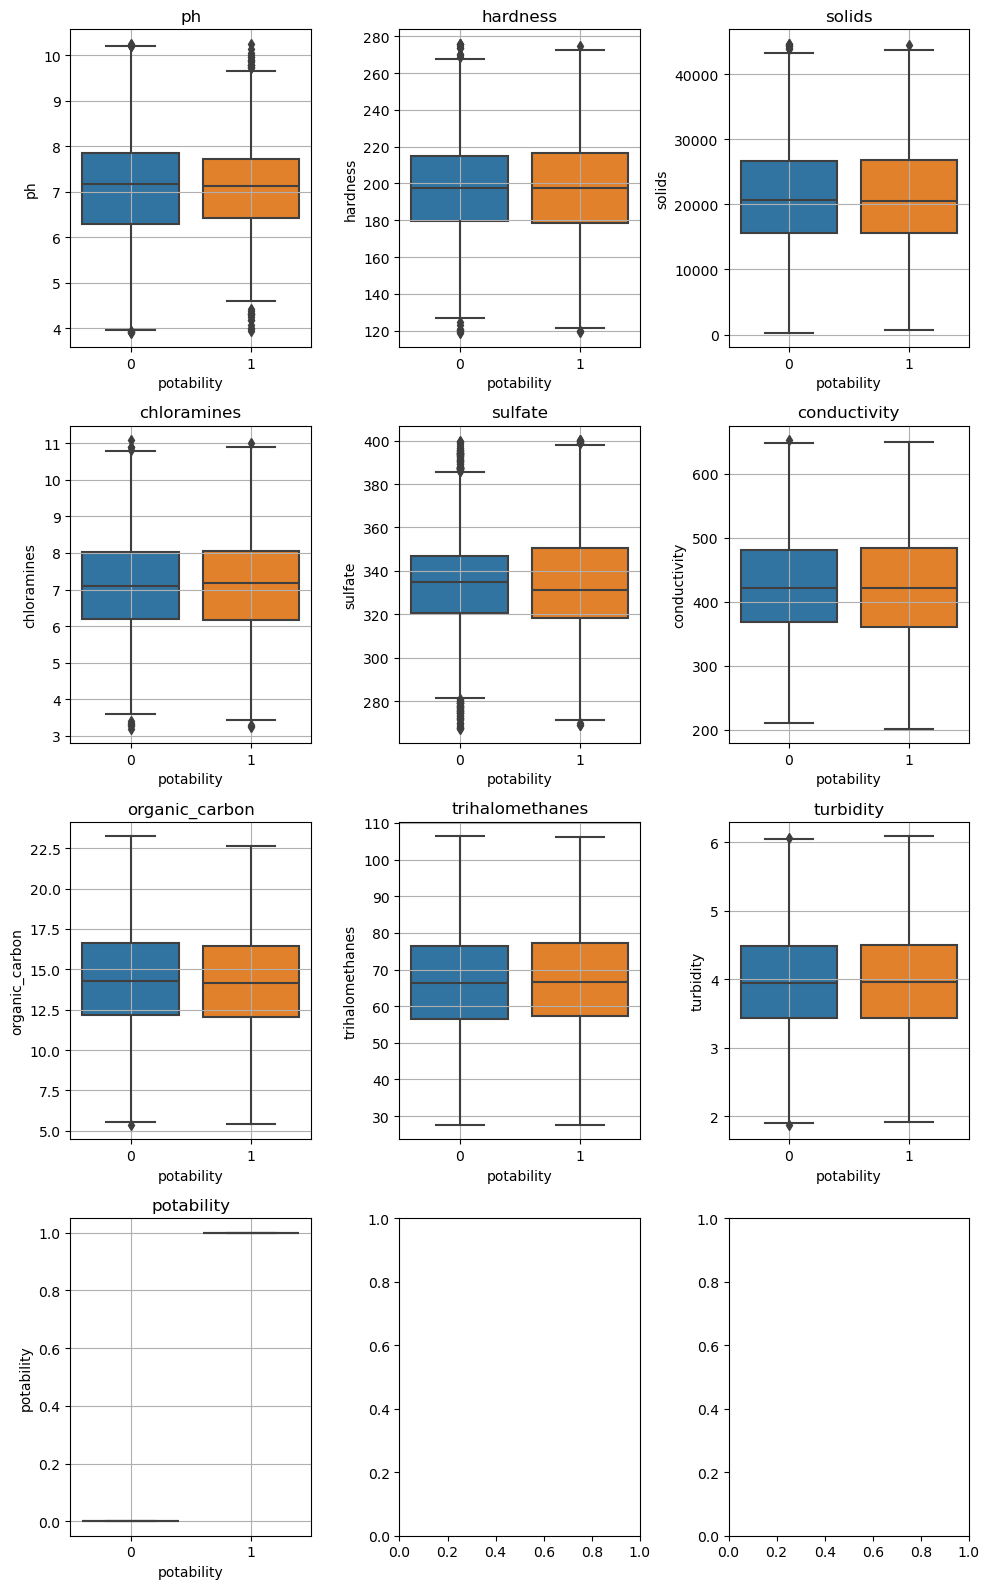

In [40]:
def display_boxplots(df, columns_to_analyze, num_cols_per_row=3, figsize=(10, 4)):
    # Ustawienia układu wykresów
    num_cols = len(columns_to_analyze)
    num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(figsize[0], figsize[1] * num_rows))
    fig.subplots_adjust(hspace=0.5)

    # Wyświetlenie boxplotów dla każdej kolumny z uwzględnieniem potability
    for i, column in enumerate(columns_to_analyze):
        row, col = divmod(i, num_cols_per_row)
        sns.boxplot(data=df, x='potability', y=column, ax=axs[row, col])
        axs[row, col].set_title(f'{column}')
        axs[row, col].grid(True)

    plt.tight_layout()
    plt.show()

# Przykład użycia funkcji
display_boxplots(df_cleaned, columns_to_analyze=df_cleaned.columns)

In [41]:
def count_outliers_by_potability(df, multiplier=1.5):
    # Utworzenie ramki danych do zliczania wartości odstających
    outliers_count = pd.DataFrame(index=['potability_0', 'potability_1'], columns=df.columns)
    outliers_count = outliers_count.fillna(0)

    # Iteracja przez kolumny
    for column in df.columns:
        # Iteracja po wartościach potability (0 i 1)
        for potability_value in [0, 1]:
            # Wybór danych dla danej kolumny i wartości potability
            subset = df[df['potability'] == potability_value][column]

            # Obliczenie granic odstających
            Q1 = subset.quantile(0.25)
            Q3 = subset.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            # Zliczenie wartości odstających
            outliers_count.loc[f'potability_{potability_value}', column] = ((subset < lower_bound) | (subset > upper_bound)).sum()

    return outliers_count

# Przykład użycia funkcji
outliers_count = count_outliers_by_potability(df_cleaned)
print("Liczba wartości odstających w każdej kolumnie z podziałem na potability:")
print(outliers_count)


Liczba wartości odstających w każdej kolumnie z podziałem na potability:
              ph  hardness  solids  chloramines  sulfate  conductivity  \
potability_0  11        17       7           10       99             1   
potability_1  30         4       1            4       10             0   

              organic_carbon  trihalomethanes  turbidity  potability  
potability_0               1                0          2           0  
potability_1               0                0          0           0  


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from itertools import product


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [44]:
# Splitting the DataFrame 'df' into three subsets: training, validation, and testing.
df_full_train, df_test, = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Przygotowanie danych treningowych i walidacyjnych
X_train = df_train.drop('potability', axis=1)
y_train = df_train['potability']

# Displaying the sizes of different data sets
n = len(df)
n_full_train = len(df_full_train)
n_train = len(df_train)
n_val = len(df_val)
n_test = len(df_test)

print(f"n_dataset = \t\t{n}")
# print(f"n_full_train = \t\t{n_full_train}")
print(f"n_train = \t\t{n_train}\t{(n_train / n) * 100:.0f}%")
print(f"n_val = \t\t{n_val}\t{(n_val / n) * 100:.0f}%")
print(f"n_test = \t\t{n_test}\t{(n_test / n) * 100:.0f}%")
print(f"check of sum:\n(train + val + test) = \t{n_train + n_val + n_test}")



n_dataset = 		3276
n_train = 		1965	60%
n_val = 		655	20%
n_test = 		656	20%
check of sum:
(train + val + test) = 	3276


In [45]:
# y_train = df_train["potability"]
y_val = df_val["potability"]
y_test = df_test["potability"]

# del df_train["potability"]
del df_val["potability"]
del df_test["potability"]

In [46]:
# preparation of features_matrices:
# X_train = df_train
X_val = df_val
X_test = df_test

In [51]:
def evaluate_models(X_train, y_train, X_test, y_test):
    # Modele
    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        # "Support Vector Machine": SVC(),
        "Naive Bayes": GaussianNB(),
        # "K Neighbors (3 neighbors)": KNeighborsClassifier(n_neighbors=2)  # Dodajemy KNeighborsClassifier z 3 sąsiadami
    }

    # # Różne wartości parametru C do przetestowania dla modelu SVM
    # c_values = [0.001, 0.01, 0.1, 1, 10, 100]

    # for c_value in c_values:
    #     # Tworzenie i trenowanie modelu SVM z daną wartością C
    #     svm_model = SVC(C=c_value)
    #     models[f"SVM (C={c_value})"] = svm_model

    # Trenowanie i ewaluacja modeli<
    for model_name, model in models.items():
        # Trenowanie modelu
        model.fit(X_train, y_train)

        # Ewaluacja modelu
        train_predictions = model.predict(X_train)
        test_prediction = model.predict(X_test)

        print(f"{model_name} Evaluation:")
        train_accuracy = accuracy_score(y_train, train_predictions)
        test_accuracy = accuracy_score(y_test, test_prediction)

        confusion_matrix_train = confusion_matrix(y_train, train_predictions)
        confusion_matrix_test = confusion_matrix(y_test, test_prediction)

        classification_report_train = classification_report(y_train, train_predictions)
        classification_report_test = classification_report(y_test, test_prediction)

        
        print(f"Accuracy_train: {train_accuracy:.2f}")
        print(f"Confusion Matrix:\n{confusion_matrix_train}")
        print(f"Classification Report:\n{classification_report_train}")

        print(f"Accuracy_test: {test_accuracy:.2f}")
        print(f"Confusion Matrix:\n{confusion_matrix_test}")
        print(f"Classification Report:\n{classification_report_test}")
        print("-" * 50)

# Wywołanie funkcji z danymi treningowymi i testowymi
evaluate_models(X_train, y_train, X_test, y_test)


Logistic Regression Evaluation:
Accuracy_train: 0.61
Confusion Matrix:
[[1187    2]
 [ 766   10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1189
           1       0.83      0.01      0.03       776

    accuracy                           0.61      1965
   macro avg       0.72      0.51      0.39      1965
weighted avg       0.70      0.61      0.47      1965

Accuracy_test: 0.63
Confusion Matrix:
[[412   0]
 [243   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       1.00      0.00      0.01       244

    accuracy                           0.63       656
   macro avg       0.81      0.50      0.39       656
weighted avg       0.77      0.63      0.49       656

--------------------------------------------------
Random Forest Evaluation:
Accuracy_train: 1.00
Confusion Matrix:
[[1189    0]
 [   0  776]

In [52]:
# Defining a function to evaluate different machine learning models
def evaluate_models(X_train, y_train, X_test, y_test):
    # Different values of the n_neighbors parameter to test for the KNeighborsClassifier model
    n_neighbors_values = [3, 5, 7, 9, 11]
    models = {}

    # Creating K Neighbors Classifier models with varying n_neighbors values
    for n_neighbors_value in n_neighbors_values:
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors_value)
        models[f"K Neighbors ({n_neighbors_value} neighbors)"] = knn_model

    # Different values of the C parameter to test for the SVM model
    c_values = [0.001, 0.01, 0.1, 1, 10, 100]

    # Creating Support Vector Machine (SVM) models with varying C values
    for c_value in c_values:
        svm_model = SVC(C=c_value)
        models[f"SVM (C={c_value})"] = svm_model

    # Training and evaluating models
    for model_name, model in models.items():
        # Training the model on the training data
        model.fit(X_train, y_train)

        # Making predictions on both the training and testing data
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        # Printing evaluation metrics for each model
        print(f"{model_name} Evaluation:")
        train_accuracy = accuracy_score(y_train, train_predictions)
        test_accuracy = accuracy_score(y_test, test_predictions)

        confusion_matrix_train = confusion_matrix(y_train, train_predictions)
        confusion_matrix_test = confusion_matrix(y_test, test_predictions)

        classification_report_train = classification_report(y_train, train_predictions)
        classification_report_test = classification_report(y_test, test_predictions)

        # Printing accuracy, confusion matrix, and classification report for training data
        print(f"Accuracy_train: {train_accuracy:.2f}")
        print(f"Confusion Matrix (Train):\n{confusion_matrix_train}")
        print(f"Classification Report (Train):\n{classification_report_train}")

        # Printing accuracy, confusion matrix, and classification report for testing data
        print(f"Accuracy_test: {test_accuracy:.2f}")
        print(f"Confusion Matrix (Test):\n{confusion_matrix_test}")
        print(f"Classification Report (Test):\n{classification_report_test}")
        print("-" * 50)

# Calling the function with training and testing data
evaluate_models(X_train, y_train, X_test, y_test)

K Neighbors (3 neighbors) Evaluation:
Accuracy_train: 0.77
Confusion Matrix:
[[1020  169]
 [ 283  493]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1189
           1       0.74      0.64      0.69       776

    accuracy                           0.77      1965
   macro avg       0.76      0.75      0.75      1965
weighted avg       0.77      0.77      0.77      1965

Accuracy_test: 0.54
Confusion Matrix:
[[285 127]
 [175  69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       412
           1       0.35      0.28      0.31       244

    accuracy                           0.54       656
   macro avg       0.49      0.49      0.48       656
weighted avg       0.52      0.54      0.53       656

--------------------------------------------------
K Neighbors (5 neighbors) Evaluation:
Accuracy_train: 0.72
Confusion Matrix:
[[1023 

In [57]:
def evaluate_model_cv(X_train, y_train, X_test, y_test, hyperparameters, cv_values):
    for cv in cv_values:
        # Przeszukiwanie siatki
        model = XGBClassifier()
        grid_search = GridSearchCV(model, hyperparameters, cv=cv, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Najlepsze znalezione hiperparametry
        best_params = grid_search.best_params_
        print(f'CV={cv}, Best Hyperparameters: {best_params}')

        # Ewaluacja modelu z najlepszymi hiperparametrami za pomocą cross_val_score
        model_with_best_params = XGBClassifier(**best_params)

        # Walidacja krzyżowa dla danych treningowych
        scores_train = cross_val_score(model_with_best_params, X_train, y_train, cv=cv, scoring='accuracy')
        mean_accuracy_train = scores_train.mean()

        # Walidacja krzyżowa dla danych testowych
        scores_test = cross_val_score(model_with_best_params, X_test, y_test, cv=cv, scoring='accuracy')
        mean_accuracy_test = scores_test.mean()

        # Wyświetlenie wyników Accuracy
        print(f'CV={cv}, Mean Accuracy on Training Set: {mean_accuracy_train}')
        print(f'CV={cv}, Mean Accuracy on Test Set: {mean_accuracy_test}')

        # Wyświetlenie wyników MSE
        mse_train = -cross_val_score(model_with_best_params, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
        mse_test = -cross_val_score(model_with_best_params, X_test, y_test, cv=cv, scoring='neg_mean_squared_error')
        mean_mse_train = mse_train.mean()
        mean_mse_test = mse_test.mean()

        print(f'CV={cv}, Mean Squared Error (MSE) on Training Set: {mean_mse_train}')
        print(f'CV={cv}, Mean Squared Error (MSE) on Test Set: {mean_mse_test}')

        # Tworzenie wykresu
        param_combinations = list(product(*hyperparameters.values()))
        param_combinations_str = [str(params) for params in param_combinations]


# Przykład użycia
hyperparameters = {
    'eta': [0.01, 0.1, 0.2, 0.5, 1],
    'n_estimators': [15, 25 , 50, 75, 100],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7, 10],
    'subsample': [0.2, 0.5, 0.7]
}

# X_train, y_train to dane treningowe, X_test, y_test to dane testowe
evaluate_model_cv(X_train, y_train, X_test, y_test, hyperparameters, cv_values=[2, 3, 4, 5])


CV=2, Best Hyperparameters: {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 25, 'subsample': 0.7}
CV=2, Mean Accuracy on Training Set: 0.7821892746963139
CV=2, Mean Accuracy on Test Set: 0.698170731707317
CV=2, Mean Squared Error (MSE) on Training Set: 0.2178107253036861
CV=2, Mean Squared Error (MSE) on Test Set: 0.3018292682926829
CV=3, Best Hyperparameters: {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 25, 'subsample': 0.7}
CV=3, Mean Accuracy on Training Set: 0.7944020356234097
CV=3, Mean Accuracy on Test Set: 0.7073017468895312
CV=3, Mean Squared Error (MSE) on Training Set: 0.20559796437659036
CV=3, Mean Squared Error (MSE) on Test Set: 0.29269825311046876
CV=4, Best Hyperparameters: {'eta': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}
CV=4, Mean Accuracy on Training Set: 0.7918550163098372
CV=4, Mean Accuracy on Test Set: 0.7164634146341463
CV=4, Mean Squared Error (MSE) on Training Set: 0.2081449836

In [69]:
# Najlepsze hiperparametry uzyskane z kroswalidacji
best_hyperparameters = {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 25, 'subsample': 0.7}

# Tworzenie modelu XGBoost z najlepszymi hiperparametrami
model_xgbCl = XGBClassifier(
    learning_rate=best_hyperparameters['eta'],
    max_depth=best_hyperparameters['max_depth'],
    min_child_weight=best_hyperparameters['min_child_weight'],
    n_estimators=best_hyperparameters['n_estimators'],
    subsample=best_hyperparameters['subsample']
)

# Trenowanie modelu na danych treningowych
model_xgbCl.fit(X_train, y_train)

# Przewidywanie na danych treningowych
predictions_train = model_xgbCl.predict(X_train)

# Przewidywanie na danych walidacyjnych
predictions_val = model_xgbCl.predict(X_val)

# Ocena modelu na danych treningowych
train_accuracy = accuracy_score(y_train, predictions_train)
train_mse = mean_squared_error(y_train, predictions_train)

# Ocena modelu na danych walidacyjnych
valid_accuracy = accuracy_score(y_val, predictions_val)
valid_mse = mean_squared_error(y_val, predictions_val)


# Ewaluacja modelu na zbiorze treningowym
print("XGBoost Evaluation on Training Set:")
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Accuracy_train: {accuracy_train:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train, predictions_train)}")
print(f"Classification Report:\n{classification_report(y_train, predictions_train)}")

# Ewaluacja modelu na zbiorze testowym
print("XGBoost Evaluation on Validation Set:")
accuracy_test = accuracy_score(y_val, predictions_val)
print(f"Accuracy_test: {accuracy_test:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_val, predictions_val)}")
print(f"Classification Report:\n{classification_report(y_val, predictions_val)}")

print(f"Train MSE: {train_mse}")
print(f"Validation MSE: {valid_mse}")

XGBoost Evaluation on Training Set:
Accuracy_train: 0.87
Confusion Matrix:
[[1113   76]
 [ 186  590]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      1189
           1       0.89      0.76      0.82       776

    accuracy                           0.87      1965
   macro avg       0.87      0.85      0.86      1965
weighted avg       0.87      0.87      0.86      1965

XGBoost Evaluation on Validation Set:
Accuracy_test: 0.78
Confusion Matrix:
[[348  49]
 [ 97 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       397
           1       0.77      0.62      0.69       258

    accuracy                           0.78       655
   macro avg       0.77      0.75      0.76       655
weighted avg       0.78      0.78      0.77       655

Train MSE: 0.13333333333333333
Validation MSE: 0.22290076335877862


In [66]:
# Definicja hiperparametrów
xgb_params = {
    'n_estimators': 50,
    'eta': 0.1,
    'max_depth': 7,
    'min_child_weight': 6,
    'subsample': 0.7
}

# Inicjalizacja modelu z zadanymi hiperparametrami
model_xgbCl = XGBClassifier(**xgb_params)

# Trenowanie modelu
model_xgbCl.fit(X_train, y_train)

# Predykcja na zbiorze testowym
predictions_train = model_xgbCl.predict(X_train)
predictions_test = model_xgbCl.predict(X_test)

# Ewaluacja modelu na zbiorze treningowym
print("XGBoost Evaluation on Training Set:")
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Accuracy_train: {accuracy_train:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train, predictions_train)}")
print(f"Classification Report:\n{classification_report(y_train, predictions_train)}")

# Ewaluacja modelu na zbiorze testowym
print("XGBoost Evaluation on Test Set:")
accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Accuracy_test: {accuracy_test:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions_test)}")
print(f"Classification Report:\n{classification_report(y_test, predictions_test)}")

XGBoost Evaluation on Training Set:
Accuracy_train: 0.90
Confusion Matrix:
[[1137   52]
 [ 152  624]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1189
           1       0.92      0.80      0.86       776

    accuracy                           0.90      1965
   macro avg       0.90      0.88      0.89      1965
weighted avg       0.90      0.90      0.89      1965

XGBoost Evaluation on Test Set:
Accuracy_test: 0.79
Confusion Matrix:
[[364  48]
 [ 91 153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       412
           1       0.76      0.63      0.69       244

    accuracy                           0.79       656
   macro avg       0.78      0.76      0.76       656
weighted avg       0.79      0.79      0.78       656



In [ ]:
df.iloc[10]

Using model

In [ ]:
# Use the model to make predictions
pred_data = X_val[50:55]
pred_data

In [ ]:
# Make a prediction for woter potablity using a XGBostClasifier model
prediction_water_potability = model_xgbCl.predict([[7.360640, 165.520797, 32452.614409, 7.550701, 326.624353, 425.383419, 15.586810, 78.740016, 3.662292]])


In [ ]:
# Define milk quality labels
water_potability_labels = ["undrinkable", "drinkable"]

# Iterate through the predictions for milk quality
for prediction in prediction_water_potability:
    # Check if the prediction falls within the valid label indices
    if 0 <= prediction < len(water_potability_labels):
        # Print the corresponding milk quality label based on the prediction
        print(f"The water quality is '{water_potability_labels[prediction]}'")
    else:
        # Handle cases where the prediction is outside the valid range
        print("Invalid water quality prediction")

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming prediction_water_potability contains the predicted labels for water potability

# Define water potability labels
water_potability_labels = ["undrinkable", "drinkable"]

# Convert labels to numerical values for calculation
numerical_labels = [water_potability_labels.index(label) for label in water_potability_labels]

# Calculate the percentage of predictions for each class
percentage_drinkable = sum(prediction == numerical_labels[1] for prediction in prediction_water_potability) / len(prediction_water_potability) * 100
percentage_undrinkable = 100 - percentage_drinkable

# Print the results
print(f"Percentage of 'undrinkable' predictions: {percentage_undrinkable:.2f}%")
print(f"Percentage of 'drinkable' predictions: {percentage_drinkable:.2f}%")


Save the mode

In [ ]:
import pickle
import os

In [ ]:
output_file = f"model_wpp.pkl"

In [ ]:
output_file

In [ ]:
f_out = open(output_file, "wb")
pickle.dump(model_xgbCl, f_out)
f_out.close()

In [ ]:
!ls -lh *.pkl

In [ ]:
# Get the full path to the saved file
output_filepath = os.path.abspath(output_file)

# Display the saved model's name and its full path
print(f"Saved the model as: {output_file}")
print(f"Full path to the saved model: {output_filepath}")

In [ ]:
with open(output_file, "wb") as f_out:
    pickle.dump(model_xgbCl, f_out)

In [ ]:
df.iloc[2000].values

Load the model

In [ ]:
import pickle

In [ ]:
input_file = "model_wpp.pkl"

In [ ]:
with open(input_file, "rb") as f_in:
    model = pickle.load(f_in)

In [ ]:
model


Test the model

In [5]:
import requests

In [6]:
url = "http://localhost:9696/predict"

In [7]:
water_data = {
  'ph': 7.442023,
  'hardness': 1.9476,
  'solids': 3.4565,
  'chloramines': 8.493347,
  'sulfate': 2.9483,
  'conductivity': 3.50085,
  'organic_carbon': 1.89620,
  'trihalomethanes': 7.9958,
  'turbidity': 2.894651
}

In [8]:
response = requests.post(url, json=water_data).json()

In [9]:
response

{'water_quality': 'drinkable'}